# Title
[]()

In [1]:
import requests
import json
from pandas import json_normalize  
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\src")
from silvhua import *
from custom_nlp import *
import pickle
import os


In [2]:
from FB_scripts import *

In [3]:
with open("credentials.json") as f:
    credentials = json.load(f)

# `get_user_ig_post_text`

## Version 1

In [ ]:
def get_user_ig_post_text(ig_user_id, access_token, pages=5, since=None, until=None,
    filename=None,
    json_path=r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\raw',
    csv_path=r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\interim'):
    """ SH 2023-02-08 21:04 Modify so it can take date paramters
    Pull the media from a given Instagram account.

    Parameters:
        - ig_user_id: Can be obtained from Facebook Graph API explorer using this query 
            (requires business_management permission, possibly others also): 
             me/accounts?fields=instagram_business_account{id,name,username,profile_picture_url}
        - access_token
        - pages: Number of pages of results to retrieve starting in reverse chronological order.
            Each page of results provides 25 posts.
        - since and until (str): Date in 'yyyy-mm-dd format', e.g. '2023-01-01'
        - filename (str): Filename (without extension) for saving the outputs. If None, outputs are not saved.
            For outputs to be saved, the custom functions save_csv and savepickle must be imported.
        - json_path and csv_path (raw string): path to which to save the json and dataframe outputs,
            respectively.
    
    Returns
        - df: DataFrame with the following information (1 post/reel per row)
            - caption
            - like count
            - comments count
            - top-level comments: If the amount of comments is high (>53 commments), it will provide the endpoints, 
                it will return additional endpoints for additional comments ('comments.paging.*').
            - media type: video or image
            - media product type: reels or feed
            - media URL (not available for all reels)
            - permalink
            - timestamp
            - post id
            - comments.data (list of dictionaries): timestamp, username, text, like count, and comment id.
            - thumbnail URL of videos
        - response_json: JSON object with each page number of results as the key (starting with 1)
    Example syntax:
        df2022, response_json2022 = get_user_ig_post_text(credentials['ig_user_id'], credentials['access_token'],
        pages=50, since='2022-01-01', until='2022-12-31', filename='my_ig_posts_2022')

    """
    user_id = str(ig_user_id)
    url_root = "https://graph.facebook.com/v15.0/"
    url_without_token = f'{url_root}{ig_user_id}/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D'
    if since:
        url_without_token += f'&since={datetime.timestamp(datetime.strptime(since, "%Y-%m-%d"))}'
    if until:
        url_without_token += f'&until={datetime.timestamp(datetime.strptime(until, "%Y-%m-%d"))}'

    url = url_without_token+'&access_token='+access_token
    
    print(url_without_token)
    response_json_dict = dict()
    df_list = []
    for page in range(1,pages+1):
        response = requests.get(url)
        print(f'Requesting page {page}...')
        print('\tResponse status code: ',response.status_code)
        response_json_dict[page] = response.json()
        if response.status_code//100 != 2: # Stop the function if there is an error in the request
            print(response_json_dict[page]['error'])
            break
        try:
            df_list.append(json_normalize(response_json_dict[page], record_path='data'))
        except:
            print('No data in request response for page', page)
        try:
            next_endpoint = response_json_dict[page]['paging']['next']
            if next_endpoint+access_token != url:
                url = next_endpoint
            else:
                print('end')
                break
        except: 
            pass
    try:
        df = pd.concat(df_list)
        print('Number of posts:',len(df))
    except:
        df = response
    if filename:
        try:
            save_csv(df,filename,csv_path)
            savepickle(response_json_dict,filename,'sav',json_path)
        except:
            print('Unable to save outputs')
    return df, response_json_dict

df2022, response_json2022 = get_user_ig_post_text(credentials['ig_user_id'], credentials['access_token'],
        pages=50, since='2022-01-01', until='2022-12-31', filename='my_ig_posts_2022')

https://graph.facebook.com/v15.0/17841403231458630/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D&since=1641024000.0&until=1672473600.0
Requesting page 1...
	Response status code:  200
Requesting page 2...
	Response status code:  200
Requesting page 3...
	Response status code:  200
Requesting page 4...
	Response status code:  200
Requesting page 5...
	Response status code:  200
Requesting page 6...
	Response status code:  200
Requesting page 7...
	Response status code:  200
Requesting page 8...
	Response status code:  200
Requesting page 9...
	Response status code:  200
Requesting page 10...
	Response status code:  200
Requesting page 11...
	Response status code:  200
Requesting page 12...
	Response status code:  200
Requesting page 13...
	Response status code:  200
Requesting page

In [ ]:
df_am50, response_json_am50 = get_user_ig_post_text(credentials['am_ig_user_id'], 
        credentials['am3_access_token'], pages=50, since='2018-10-01', until='2023-01-31',
        filename='am_ig_posts_50pages_2023-01-31')

https://graph.facebook.com/v15.0/17841401256046961/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D&since=1538377200.0&until=1675152000.0
Requesting page 1...
	Response status code:  400
{'message': 'Error validating access token: The session has been invalidated because the user changed their password or Facebook has changed the session for security reasons.', 'type': 'OAuthException', 'code': 190, 'error_subcode': 460, 'fbtrace_id': 'AQlg3gtsmP4ImtnfC_G8X05'}
Unable to save outputs


In [4]:
df202301, response_json202301 = get_user_ig_post_text(credentials['ig_user_id'], credentials['access_token'],
        pages=50, since='2023-01-01', until='2023-01-31')
# All the pages are the same results

https://graph.facebook.com/v15.0/17841403231458630/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D&since=1672560000.0&until=1675152000.0
Requesting page 1...
	Response status code:  200
Requesting page 2...
	Response status code:  200
Requesting page 3...
	Response status code:  200
Requesting page 4...
	Response status code:  200
Requesting page 5...
	Response status code:  200
Requesting page 6...
	Response status code:  200
Requesting page 7...
	Response status code:  200
Requesting page 8...
	Response status code:  200
Requesting page 9...
	Response status code:  200
Requesting page 10...
	Response status code:  200
Requesting page 11...
	Response status code:  200
Requesting page 12...
	Response status code:  200
Requesting page 13...
	Response status code:  200
Requesting page

## Version 2

In [10]:
def get_user_ig_post_text(ig_user_id, access_token, pages=5, since=None, until=None,
    filename=None,
    json_path=r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\raw',
    csv_path=r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\interim'):
    """ SH 2023-02-08 21:04 Modify so it won't keep retrieving pages if there is only 1 page of results
    Pull the media from a given Instagram account.

    Parameters:
        - ig_user_id: Can be obtained from Facebook Graph API explorer using this query 
            (requires business_management permission, possibly others also): 
             me/accounts?fields=instagram_business_account{id,name,username,profile_picture_url}
        - access_token
        - pages: Number of pages of results to retrieve starting in reverse chronological order.
            Each page of results provides 25 posts.
        - since and until (str): Date in 'yyyy-mm-dd format', e.g. '2023-01-01'
        - filename (str): Filename (without extension) for saving the outputs. If None, outputs are not saved.
            For outputs to be saved, the custom functions save_csv and savepickle must be imported.
        - json_path and csv_path (raw string): path to which to save the json and dataframe outputs,
            respectively.
    
    Returns
        - df: DataFrame with the following information (1 post/reel per row)
            - caption
            - like count
            - comments count
            - top-level comments: If the amount of comments is high (>53 commments), it will provide the endpoints, 
                it will return additional endpoints for additional comments ('comments.paging.*').
            - media type: video or image
            - media product type: reels or feed
            - media URL (not available for all reels)
            - permalink
            - timestamp
            - post id
            - comments.data (list of dictionaries): timestamp, username, text, like count, and comment id.
            - thumbnail URL of videos
        - response_json: JSON object with each page number of results as the key (starting with 1)
    Example syntax:
        df2022, response_json2022 = get_user_ig_post_text(credentials['ig_user_id'], credentials['access_token'],
        pages=50, since='2022-01-01', until='2022-12-31', filename='my_ig_posts_2022')

    """
    user_id = str(ig_user_id)
    url_root = "https://graph.facebook.com/v15.0/"
    url_without_token = f'{url_root}{ig_user_id}/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D'
    if since:
        url_without_token += f'&since={datetime.timestamp(datetime.strptime(since, "%Y-%m-%d"))}'
    if until:
        url_without_token += f'&until={datetime.timestamp(datetime.strptime(until, "%Y-%m-%d"))}'

    url = url_without_token+'&access_token='+access_token
    
    print(url_without_token)
    response_json_dict = dict()
    df_list = []
    for page in range(1,pages+1):
        response = requests.get(url)
        print(f'Requesting page {page}...')
        print('\tResponse status code: ',response.status_code)
        response_json_dict[page] = response.json()
        if response.status_code//100 != 2: # Stop the function if there is an error in the request
            print(response_json_dict[page]['error'])
            break
        try:
            df_list.append(json_normalize(response_json_dict[page], record_path='data'))
        except:
            print('No data in request response for page', page)
        try:
            next_endpoint = response_json_dict[page]['paging']['next']
            if next_endpoint+access_token != url:
                url = next_endpoint
            else:
                print('end')
                break
        except: 
            break
    try:
        df = pd.concat(df_list)
        print('Number of posts:',len(df))
    except:
        df = response
    if filename:
        try:
            save_csv(df,filename,csv_path)
            savepickle(response_json_dict,filename,'sav',json_path)
        except:
            print('Unable to save outputs')
    return df, response_json_dict

df202301, response_json202301 = get_user_ig_post_text(credentials['ig_user_id'], credentials['access_token'],
        pages=50, since='2023-01-01', until='2023-01-31')

https://graph.facebook.com/v15.0/17841403231458630/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D&since=1672560000.0&until=1675152000.0
Requesting page 1...
	Response status code:  200
Number of posts: 10


In [12]:
df_test, response_json_test = get_user_ig_post_text(credentials['ig_user_id'], credentials['access_token'],
        pages=50, since='2022-07-01', until='2023-01-31')

https://graph.facebook.com/v15.0/17841403231458630/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D&since=1656658800.0&until=1675152000.0
Requesting page 1...
	Response status code:  200
Requesting page 2...
	Response status code:  200
Number of posts: 30


In [13]:
df_test

,timestamp,caption,like_count,comments_count,media_type,media_product_type,media_url,permalink,id,comments.data,thumbnail_url
0,2023-01-30T20:26:58+0000,I did a lot of quantitative analyses throughou...,7,2,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CoDXzgaS2-g/,17964472544229149,"[{'timestamp': '2023-01-31T05:29:14+0000', 'te...",NaN
1,2023-01-20T19:38:19+0000,"If you've been to a Lululemon store recently, ...",1,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnpiSZEP982/,18324686224070369,NaN,NaN
2,2023-01-18T18:32:47+0000,"What’s your favourite fitness tech, app, or se...",0,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnkRMwXPDRX/,18269437663142607,NaN,NaN
3,2023-01-13T19:52:47+0000,It’s been 1 month since I finished my data sci...,42,3,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnXiYNmverQ/,18000771625581319,"[{'timestamp': '2023-01-14T15:18:44+0000', 'te...",NaN
4,2023-01-11T03:22:56+0000,There was a time when my only exercise was run...,2,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnQngpIrOIS/,17862580493850465,NaN,NaN
5,2023-01-09T21:38:41+0000,"For the US, ""Wearable technology (#1), strengt...",3,1,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnNbUXKynWR/,18072187321337751,"[{'timestamp': '2023-01-22T02:19:21+0000', 'te...",NaN
6,2023-01-07T21:38:57+0000,Pomelos are one of my favourite fruits. It is ...,10,0,CAROUSEL_ALBUM,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnIRwnxSdet/,17959482716249404,NaN,NaN
7,2023-01-06T19:42:39+0000,What's your favourite app or wearable that hel...,0,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnFfp6_Pq2a/,17907664067630004,NaN,NaN
8,2023-01-05T01:49:34+0000,NaN,3,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnBADl3J7Ce/,18160646815273268,NaN,NaN
9,2023-01-03T20:40:58+0000,Gamify your goals\n\nDuolingo was one of the p...,2,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/Cm938cfSI4r/,17905515278703237,NaN,NaN


# Process post data

In [17]:
def process_df_timestamp(input_df, timestamp_colum='timestamp'):
    """
    Convert dates in the json-derived dataframe from Facebook API read requests
    into different formats.

    Parameters: 
        - input_df : DataFrame with the timestamp of the data.
        - timestamp_column (str): Name of the column with the timestamp.
    """
    df = input_df.reset_index(drop=True)
    regex_date = r'.+T'
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['week_of_year'] = df['timestamp'].dt.isocalendar().week

    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['time'] = df['timestamp'].dt.time
    df['hour'] = df['timestamp'].dt.hour
    return df

In [19]:
process_df_timestamp(df_test).head(3)

,timestamp,caption,like_count,comments_count,media_type,media_product_type,media_url,permalink,id,comments.data,thumbnail_url,date,year,month,week_of_year,day_of_week,time,hour
0,2023-01-30 20:26:58+00:00,I did a lot of quantitative analyses throughou...,7,2,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CoDXzgaS2-g/,17964472544229149,"[{'timestamp': '2023-01-31T05:29:14+0000', 'te...",NaN,2023-01-30,2023,1,5,0,20:26:58,20
1,2023-01-20 19:38:19+00:00,"If you've been to a Lululemon store recently, ...",1,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnpiSZEP982/,18324686224070369,NaN,NaN,2023-01-20,2023,1,3,4,19:38:19,19
2,2023-01-18 18:32:47+00:00,"What’s your favourite fitness tech, app, or se...",0,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnkRMwXPDRX/,18269437663142607,NaN,NaN,2023-01-18,2023,1,3,2,18:32:47,18


In [30]:
import re
import numpy as np
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import unicodedata
def preprocess_post_text(doc):
    """
    Prepare data from text documents for NLP:
    - Convert to lowercase
    - Remove formatting
    - Remove all the special characters
    - Remove all single characters
    - Substitute multiple spaces with single space

    Parameters:
    doc (string): Document.

    Returns: Processed doc.
    """
    wnl = WordNetLemmatizer()
    try:
        # Remove apostrophes before tokenization to preserve contractions like "should've"
        doc = re.sub(r"(\b\w+)'(\w+\b)", r'\1\2', doc)

        # Split text into single words (also gets rid of extra white spaces)
        words = word_tokenize(doc)

        # Remove text formatting
        words = [unicodedata.normalize('NFKD', word) for word in words]
        
        # Convert to lower case
        words = [word.lower() for word in words]

        # Lemmatize words (must be done after conversion to lower case)
        words = [wnl.lemmatize(word) for word in words]
        
        # join words back together as a string
        words = ''.join([word+' ' for word in words])

        # Join @ and # to the subsequent word to retain handles and hashtags
        words = re.sub(r'@ \w+', 'zzzHandle', words)
        words = re.sub(r'# (\w+)', r'zzzHashtag\1', words)

        # Remove any URLs 
        words = re.sub(r'\w*\.+\w*', '', words) # Remove periods in middle of word
        words = re.sub(r'\w*/+\w*', '', words) # remove forward slash in middle of word
        words = re.sub(r'\w*/+\w*', '', words)

        # Replace hypthens with spaces
        words = re.sub(r'(\w+)-(\w+)*', r'\1 \2', words)
        words = re.sub(r'(\w+)-(\w+)*', r'\1 \2', words)

        # Remove numbers
        words = re.sub(r'\d:\d\d[\-a-zA-Z]*','zzzTime', words) # Time of day
        words = re.sub(r'\b\d+\b', 'zzzNumber', words)
        words = re.sub(r'\b\d+\w+\b', 'zzzNumber', words) #Number with letters

        # remove special characters
        non_hashtag_punctuation = ''.join([char for char in string.punctuation if char not in '#@'])
        words = ''.join([char for char in words if char not in non_hashtag_punctuation])

        return words
    except: # In case value is nan
        return 'zzzEmpty'

from sklearn.feature_extraction.text import CountVectorizer
from custom_nlp import *
def post_preprocessing(input_df, text_column='caption', n_top_to_print=10,
    filename=None,
    path=r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\interim', **kwargs):
    df = process_df_timestamp(input_df)
    df[text_column] = df[text_column].apply(lambda x: preprocess_post_text(x))

    # kwargs
    stop_words = kwargs.get('stop_words', 'english')
    token_pattern = kwargs.get('token_pattern', r"(?u)\b\w\w+\b")
    ngram_range = kwargs.get('ngram_range', (1,1))
    max_df = kwargs.get('max_df', 1.0)
    min_df = kwargs.get('min_df', 2)
    max_features = kwargs.get('max_features', None)
    
    print('Token pattern:', token_pattern)

    vect = CountVectorizer(
            stop_words=stop_words, 
            token_pattern=token_pattern,
            ngram_range=ngram_range,
            max_df=max_df,
            min_df=min_df,
            max_features=max_features
        )

    vect.fit(df['caption'])
    vector = vect.transform(df['caption'])
    print('Shape of vector array: ', vector.shape)
    vector_df = pd.DataFrame(vector.toarray(), columns=vect.get_feature_names_out())

    # Replace zzz tags with brackets 
    vector_df.columns = vector_df.columns.str.replace(r'zzzhashtag(\w+)', r'#\1', regex=True)
    vector_df.columns = vector_df.columns.str.replace(r'zzz(\w+)', r'<\1>', regex=True)
    df['caption'] = df['caption'].apply(lambda x: re.sub(r'zzzHashtag(\w+)', r'#\1', x))
    df['caption'] = df['caption'].apply(lambda x: re.sub(r'zzz(\w+)', r'<\1>', x))
    print(f'\nTop {n_top_to_print} words:')
    print(vector_df.sum().sort_values(ascending=False).head(n_top_to_print))
    print('Time processed:', datetime.now())
    if filename:
        try:
            save_csv(df,filename+'_processed',path)
            savepickle(vector_df, filename, path=path)
        except:
            print('Unable to save outputs')

    return df, vector_df

In [42]:
preprocess_post_text('I was ecstatic')

'i wa ecstatic '

In [56]:
wnl = WordNetLemmatizer()
doc = 'am is was squat squatting squats apple apples'
print([wnl.lemmatize(word, pos='v') for word in doc.split()])
print([wnl.lemmatize(word, pos='n') for word in doc.split()])
# doc.split()

['be', 'be', 'be', 'squat', 'squat', 'squat', 'apple', 'apples']
['am', 'is', 'wa', 'squat', 'squatting', 'squat', 'apple', 'apple']


# Analyze post insights

In [21]:
path = r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\interim'
df2022 = load_csv('my_ig_posts_2022.csv', path, column1_as_index=True)

Dataframe shape:  (809, 11)
Time completed: 2023-02-08 22:40:41.540464


In [38]:
df2022.loc[1,'caption'].head(1).values

array(["With power comes responsibility.\n\nIn the fitness space, people get excited about how AI can analyze movement, but what I am most excited about is how to use AI to help people adopt healthier lifestyles--we generally know it's important to exercise, but doing it is challenging.\n\nIf Netflix and YouTube can recommend content you'll find interesting, how can a health app recommend a health practice that you'll adopt to improve your health long term?\n\nThe recommendation will likely need to account for and adapt to your preferences, personality, knowledge/skills, and life stage. It also must be the right level of difficulty: If it's too challenging, you'll get discouraged and give up. If it's too easy, you might not get much benefit or lose motivation.\n\nWhat application of AI are you most excited about? \n\n@aiforgood_foundation"],
      dtype=object)

In [31]:
df2022_processed, count_vector = post_preprocessing(df2022, max_features=1000, filename='my_ig_posts_2022')

Token pattern: (?u)\b\w\w+\b
Shape of vector array:  (809, 294)

Top 10 words:
<number>     462
wa           396
handstand    392
position     294
day          248
protein      197
skill        196
balancing    196
hand         196
core         196
dtype: int64
Time processed: 2023-02-08 22:54:08.464759
File saved:  C:/Users/silvh/OneDrive/lighthouse/portfolio-projects/online-PT-social-media-NLP/data/interim/my_ig_posts_2022_processed.csv
Time completed: 2023-02-08 22:54:08.556762
File saved:  C:/Users/silvh/OneDrive/lighthouse/portfolio-projects/online-PT-social-media-NLP/data/interim/my_ig_posts_2022.sav
Time completed: 2023-02-08 22:54:08.562764


Time completed: 2023-02-08 23:30:19.740378


wa            396
handstand     392
position      294
day           248
protein       197
balancing     196
hand          196
core          196
skill         196
time          158
good          155
muscle        153
right         150
improve       150
<empty>       149
posture       149
wall          148
practice      148
shoulder      147
cheesecake    147
stability     147
away          147
just          105
help          104
long          102
dtype: int64

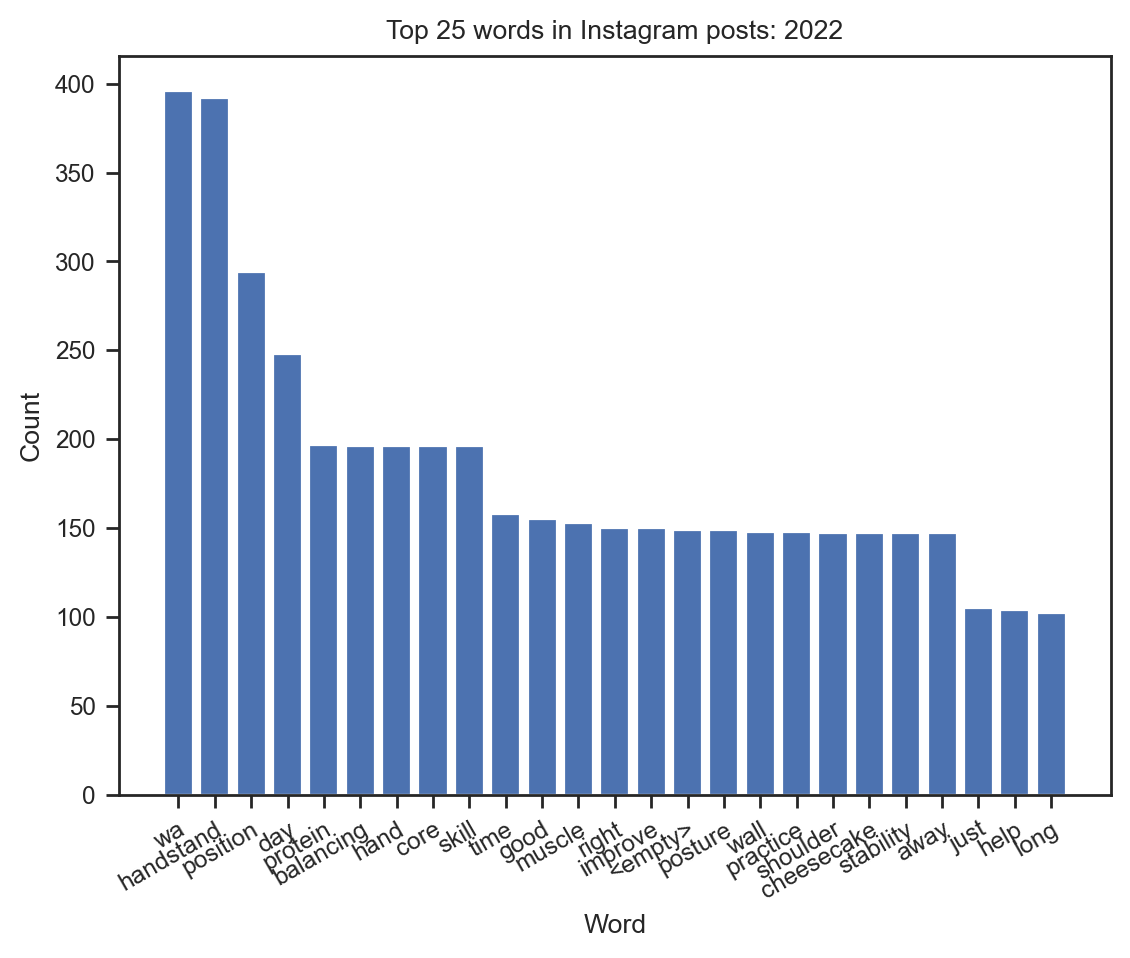

In [62]:
import seaborn as sns
import matplotlib_inline.backend_inline

def BoW_eda(df, n=30, text_column='caption', drop=['<number>'], context='paper', title_suffix=None,
    filename=None, path=r'C:\Users\silvh\OneDrive\data science job search\content'):
    sns.reset_defaults()    
    %matplotlib inline
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
    plt.rcParams['savefig.dpi'] = 300
    
    sns.set_theme(context=context, style='ticks')
    df = df.drop(columns=drop)
    top_n = df.sum().sort_values(ascending=False).head(n)
    # ax = sns.barplot(df[top_n.index.tolist()], estimator='sum',errorbar=None) # this works but gives deprecated warning
    fig, ax = plt.subplots()
    ax.bar(top_n.index, top_n)
    ax.set_xticks(top_n.index) # This line suppresses the warning "UserWarning: FixedFormatter should only be used together with FixedLocator"
    ax.set_xticklabels(top_n.index, rotation=30, ha='right', rotation_mode='anchor')
    title = f'Top {n} words in Instagram posts'
    if title_suffix:
        title = f'{title}: {title_suffix}'
    ax.set(ylabel='Count', xlabel='Word', title=title)
    ax.axis('tight')
    if filename:
        try:
            path = f'{path}/'.replace('\\','/')
            fig.savefig(path+filename, bbox_inches='tight')
            print('Saved: ', path+filename)
        except:
            print('Unable to save outputs')
    print('Time completed:', datetime.now())

    return top_n

BoW_eda(count_vector, n=25, title_suffix='2022')

In [40]:
count_vector['wa'].tail()

804    0
805    2
806    0
807    5
808    0
Name: wa, dtype: int64

In [ ]:
df2022_processed.columns

Index(['timestamp', 'caption', 'like_count', 'comments_count', 'media_type',
       'media_product_type', 'media_url', 'permalink', 'id', 'comments.data',
       'thumbnail_url', 'date', 'year', 'month', 'day_of_week', 'time',
       'hour'],
      dtype='object')

In [ ]:
print(df2022_processed['media_url'].head(1).values)

['https://scontent.cdninstagram.com/v/t51.29350-15/322778200_3359512214268300_8037939719050379800_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=cbEsAAQ-SzIAX89h4oH&_nc_oc=AQn23a4zWIwyYE_7GA5dyUqeuwd76F3nJ76OgQsh1xE08pCOWDldT_4lIHvvUoX630xqwy836HWG8wgWoSk1Nx_J&_nc_ht=scontent.cdninstagram.com&edm=AM6HXa8EAAAA&oh=00_AfCmFoy12uq05tI0E21YxYhPXrT7tEZKV5gVJLq1agdw3Q&oe=63E93EB0']


In [63]:
df2022_processed.groupby(['month']).agg(total_comments_count=('comments_count','sum'), 
                            mean_comments_count=('comments_count','mean'))

,total_comments_count,mean_comments_count
month,,
1,294,2.000000
2,196,0.666667
3,637,4.333333
4,196,4.000000
6,49,0.328859
7,9,1.285714
8,1,0.500000
9,20,4.000000
12,17,1.888889


# *End of Page*